**<p style="font-size:20px;">Western Governors University (WGU)</p>**






**<p style="font-size:20px;">Data Analytics Graduate Capstone — D214</p>**
**<p style="font-size:20px;">Task 2: Data Analytics Report and Executive Summary</p>**



**<p style="font-size:20px;">Natallia Zimnitskaya | ID: 012247127</p>**
**<p style="font-size:20px;">Master of Science, Data Analytics</p>**


**A: Research Question**

The research question, “How can leveraging structured data from Amazon customer reviews through the KNN model provide actionable insights for businesses to enhance product recommendations, customer satisfaction, and sales performance in the women’s clothing sector?” is critical for sellers navigating the highly competitive e-commerce landscape. Personalized product recommendations are pivotal in retaining customers, improving satisfaction, and driving sales. This is especially relevant for new sellers seeking to establish their foothold on the Amazon marketplace and for current sellers striving to refine their strategies and maximize their impact.  

Structured data, such as customer demographics, product details, and feedback ratings, offers a wealth of information for businesses to analyze and act upon. This research uses KNN, a machine learning algorithm adept at identifying patterns and similarities within data, to classify customer recommendations. By examining factors such as age, division, department, and ratings, this project aims to uncover the underlying drivers of product recommendations.  

In the context of the women’s clothing sector, understanding these patterns helps sellers prioritize products, tailor marketing strategies, and optimize inventory. For example, identifying which features most influence a customer’s decision to recommend a product provides actionable insights that enable businesses to make data-driven decisions. The hypothesis posits that key factors like age, product type, and feedback ratings significantly impact product recommendations, and by leveraging these insights, businesses can enhance their competitive edge.  

This research is practical and impactful as it equips sellers with valuable tools to improve customer satisfaction and sales while delivering a more personalized shopping experience for their customers. By combining structured data with the intuitive capabilities of the KNN model, this project creates an actionable framework to empower data-driven growth in e-commerce.


**B: Data Collection**

The data for this project was sourced from the dataset Amazon Reviews on Women Dresses (23K Datapoints), which includes approximately 23000 records (*Amazon Reviews on Women Dresses (23K Datapoints)*, 2022). This structured dataset provides valuable information such as customer demographics (age), product details (division_name, department_name, class_name, clothing_id), feedback metrics (rating, alike_feedback_count, recommend_index), and textual reviews (title, review_text). These features are directly aligned with the project’s goal of identifying patterns in customer satisfaction and generating recommendations in the women’s clothing sector.

The dataset was obtained from Kaggle, a widely recognized platform for publicly accessible datasets, eliminating the need for primary data collection. This streamlined the process by allowing a focus on analysis and ensuring timely progress on the project.

One notable advantage of using this Kaggle dataset is its accessibility and readiness for analysis. Unlike raw data, which typically requires extensive cleaning and validation, the organized nature of this dataset allowed for efficient exploration and feature engineering. Including key demographic and feedback variables ensured a precise alignment with the research objective, saving significant time and resources that would otherwise have been allocated for manual data collection.

One disadvantage of the data-gathering methodology is the presence of missing values in key columns such as division_name, department_name, class_name, title, and review_text. This reflects a limitation in how the dataset was initially collected or curated, as it relies on pre-gathered data from Kaggle. Some information may have been unavailable, unrecorded, or lost during the collection process. These gaps posed a potential risk to data integrity, as incomplete data could skew the analysis or reduce its reliability.

To address this challenge, a systematic preprocessing approach was implemented:
- Identify missing values: the isna().sum() function assessed the extent of missing entries in each column. This step provided a clear understanding of the affected variables.
- Remove incomplete records: rows with missing entries were removed using the dropna() method. This ensured that the dataset retained only complete and reliable data for analysis.
- Validate the cleanup process: to confirm that no null values remain, the isnull().sum() function was applied, verifying the dataset’s completeness.

While this approach successfully maintained data reliability, it came with a trade-off: removing incomplete rows reduced the dataset’s size. Despite this, the retained data was sufficient to achieve meaningful insights, ensuring the integrity and robustness of the analysis.

By utilizing the dataset and addressing its challenges, this project aims to explore customer behavior and provide insights for improving product recommendations in the women’s clothing sector.

**C: Data Extraction and Preparation**

Python was chosen to complete this project. The following are some benefits of using Python: it is open source, meaning that anyone can contribute to and improve its libraries and features; it has many necessary libraries to carry out data science-related tasks; its integration and control capabilities increase productivity; and users can embed Python codes with other programming languages, like C++, when necessary (*BasuMallick*, 2022). These benefits made Python ideal for handling the dataset, preparing it for analysis, and building a robust machine-learning model.

KNN was chosen as the classification technique for this project. KNN is an intuitive and effective method that identifies similarities between data points. It was particularly appropriate for this project because it aims to classify whether a customer will recommend a product based on features such as ratings, age, and feedback. The algorithm is straightforward to implement as it requires no training and stores all data in memory. Additionally, KNN automatically adapts to new data points, making it highly flexible for future predictions (*GeeksforGeeks*, 2025).

The data extraction and preparation process began by importing the necessary libraries, such as pandas for data manipulation and preprocessing, NumPy for numerical operations, and visualization tools like Matplotlib and Seaborn. The dataset, "women_dresses_reviews.csv," was loaded into a pandas DataFrame for exploration.

In [1]:
#import packages and libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report  
from sklearn.feature_selection import SelectKBest, f_classif  
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import warnings
warnings.filterwarnings('ignore')

#load the dataset onto the notebook
df = pd.read_csv('women_dresses_reviews.csv')

#check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [2]:
#visually inspect df to facilitate exploration, spot problems
pd.set_option('display.max_columns', None)
df

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


Initially, the column names were standardized by removing any leading or trailing spaces to ensure uniformity. Several columns, including 's.no,' 'clothing_id,' 'title,' and 'review_text,' were dropped as they were irrelevant to the analysis. 

The 's.no' and 'clothing_id' columns served as unique identifiers, offering no valuable information for understanding customer recommendations. Similarly, the 'title' and 'review_text' columns contained unstructured text data outside the scope of this structured data analysis, as the focus was on numerical and categorical variables that directly impact product recommendations.

In [3]:
#remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

#dropping the columns that are used for the project
df = df.drop(columns=['s.no', 'clothing_id', 'title', 'review_text'])

df

,age,division_name,department_name,class_name,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,0,5,1
1,62,General Petite,Tops,Blouses,12,5,1
2,47,General Petite,Bottoms,Skirts,3,1,0
3,45,General Petite,Bottoms,Pants,0,5,1
4,37,Initmates,Intimate,Swim,0,5,1
...,...,...,...,...,...,...,...
23481,44,General Petite,Dresses,Dresses,0,5,1
23482,39,General,Dresses,Dresses,1,5,1
23483,29,General Petite,Tops,Knits,0,5,1
23484,57,General,Dresses,Dresses,10,5,1


To address missing values in columns such as 'division_name,' 'department_name,' and 'class_name,' records with null entries were dropped entirely to maintain data consistency and integrity. 

In [4]:
#check for na's
df.isna().sum()

age                      0
division_name           14
department_name         14
class_name              14
alike_feedback_count     0
rating                   0
recommend_index          0
dtype: int64

In [5]:
#drop nas
df = df.dropna()
#check for nulls
df.isnull().sum()

age                     0
division_name           0
department_name         0
class_name              0
alike_feedback_count    0
rating                  0
recommend_index         0
dtype: int64

Outliers in numerical columns were identified using the Z-score method and removed to prevent them from skewing the KNN model.

In [6]:
from scipy.stats import zscore

#check for outliers and remove them
print(df.shape) 
df = df[(np.abs(zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]  # Filter out outliers
print(df.shape)  

(23472, 7)
(22943, 7)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22943 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   22943 non-null  int64 
 1   division_name         22943 non-null  object
 2   department_name       22943 non-null  object
 3   class_name            22943 non-null  object
 4   alike_feedback_count  22943 non-null  int64 
 5   rating                22943 non-null  int64 
 6   recommend_index       22943 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


The column 'recommend_index' was renamed 'recommendation' and converted to a Boolean type, making it more intuitive for classification tasks. Additionally, categorical variables such as 'division_name,' 'department_name,' and 'class_name' were converted to the 'category' data type to prepare them for encoding. 

In [8]:
#renaming 'recommend_index' to 'recommendation'
df = df.rename(columns={'recommend_index': 'recommendation'})

#convert recommendation from integer to boolean with 1 for yes and 0 for no
df['recommendation'] = df['recommendation'].astype(bool)

#convert division_name, department_name to category from string
category_columns = ['division_name', 'department_name', 'class_name']
for column in category_columns:
    df[column] = df[column].astype('category')
df

,age,division_name,department_name,class_name,alike_feedback_count,rating,recommendation
0,40,General,Bottoms,Jeans,0,5,True
1,62,General Petite,Tops,Blouses,12,5,True
2,47,General Petite,Bottoms,Skirts,3,1,False
3,45,General Petite,Bottoms,Pants,0,5,True
4,37,Initmates,Intimate,Swim,0,5,True
...,...,...,...,...,...,...,...
23481,44,General Petite,Dresses,Dresses,0,5,True
23482,39,General,Dresses,Dresses,1,5,True
23483,29,General Petite,Tops,Knits,0,5,True
23484,57,General,Dresses,Dresses,10,5,True


Visual exploration was carried out through histograms, bar charts, and pie charts better to understand the distribution of numerical and categorical data.

In [9]:
#get summary statistics for quantitative age, alike_feedback_count, and rating
df.describe()

,age,alike_feedback_count,rating
count,22943.000000,22943.000000,22943.000000
mean,42.998039,1.973805,4.199843
std,12.003023,3.324693,1.107088
min,18.000000,0.000000,1.000000
25%,34.000000,0.000000,4.000000
50%,41.000000,1.000000,5.000000
75%,51.000000,2.000000,5.000000
max,80.000000,19.000000,5.000000


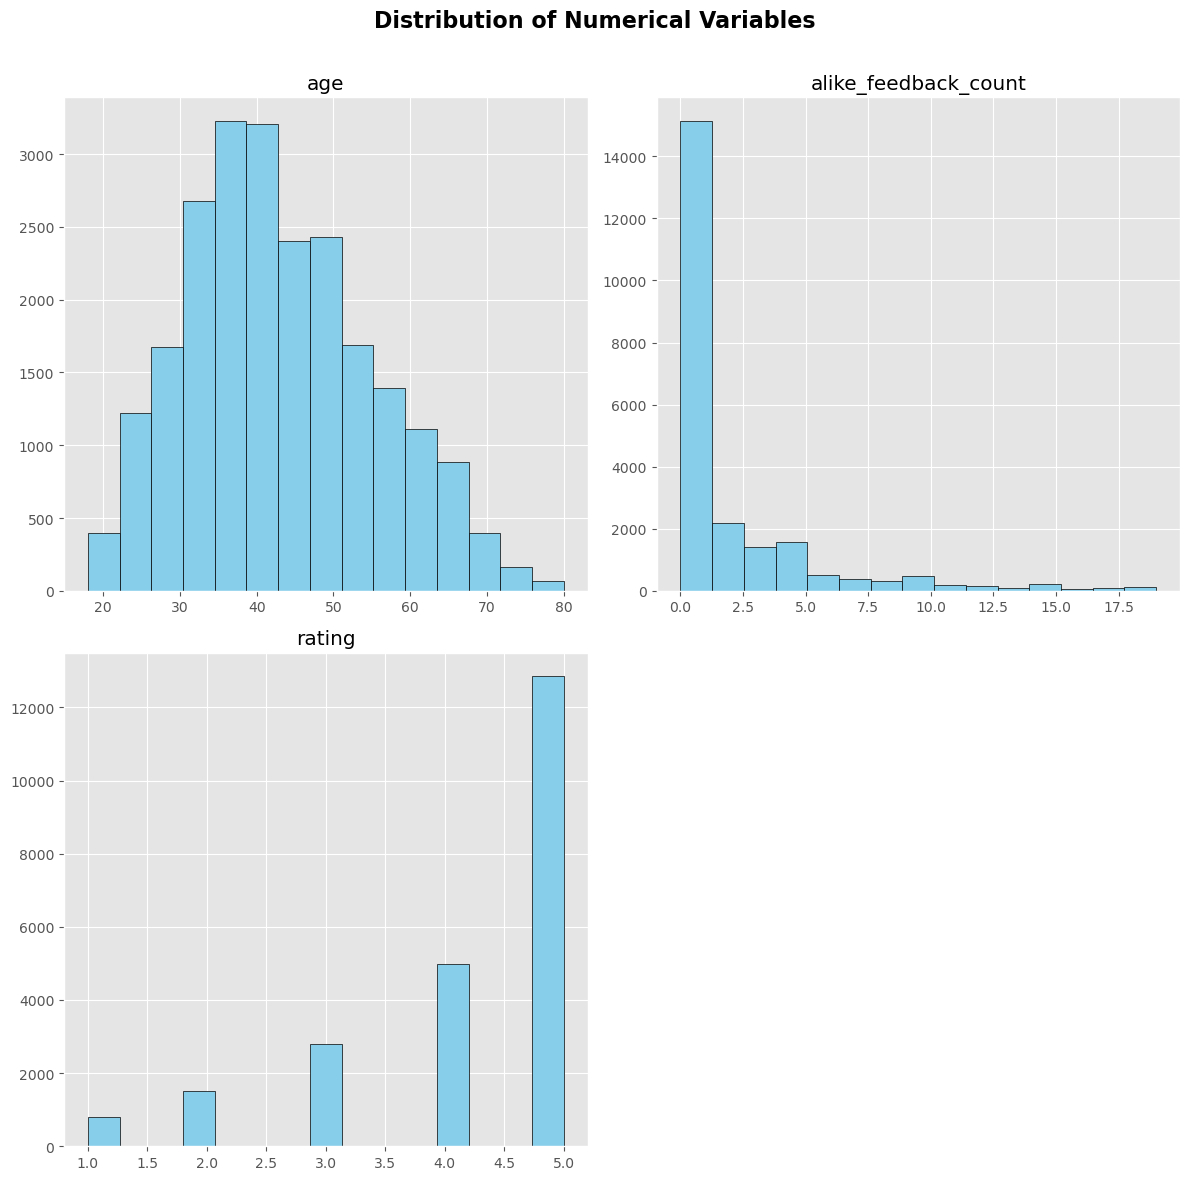

In [10]:
plt.style.use('ggplot')

#create histograms 
df.hist(
    figsize=(12, 12),  
    color='skyblue',  
    edgecolor='black',  
    bins=15  
)
plt.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to include title
plt.show()

In [11]:
#summary for division_name
df.division_name.value_counts()

division_name
General           13526
General Petite     7936
Initmates          1481
Name: count, dtype: int64

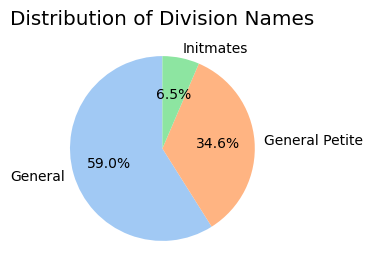

In [12]:
division_counts = df['division_name'].value_counts()

#create the pie chart 
plt.figure(figsize=(3, 3)) 
division_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title('Distribution of Division Names')
plt.ylabel('') 
plt.show()

In [13]:
#summary for department_name
df.department_name.value_counts()

department_name
Tops        10242
Dresses      6110
Bottoms      3759
Intimate     1709
Jackets      1008
Trend         115
Name: count, dtype: int64

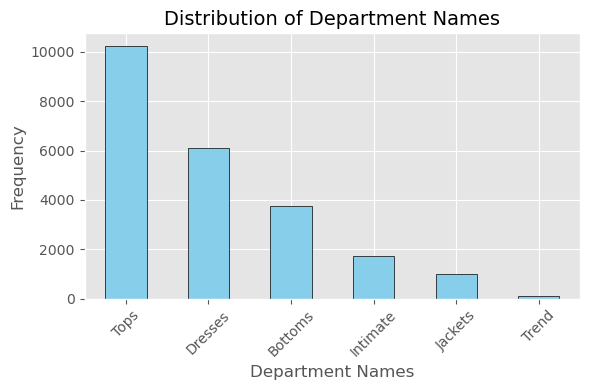

In [14]:
#create a histogram for the department_name
plt.figure(figsize=(6, 4))
df['department_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Department Names', fontsize=14)
plt.xlabel('Department Names', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [15]:
#summary for class_name 
df.class_name.value_counts()

class_name
Dresses           6110
Knits             4738
Blouses           3027
Sweaters          1399
Pants             1370
Jeans             1134
Fine gauge        1078
Skirts             937
Jackets            690
Lounge             677
Swim               345
Outerwear          318
Shorts             316
Sleep              225
Legwear            164
Intimates          154
Layering           143
Trend              115
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

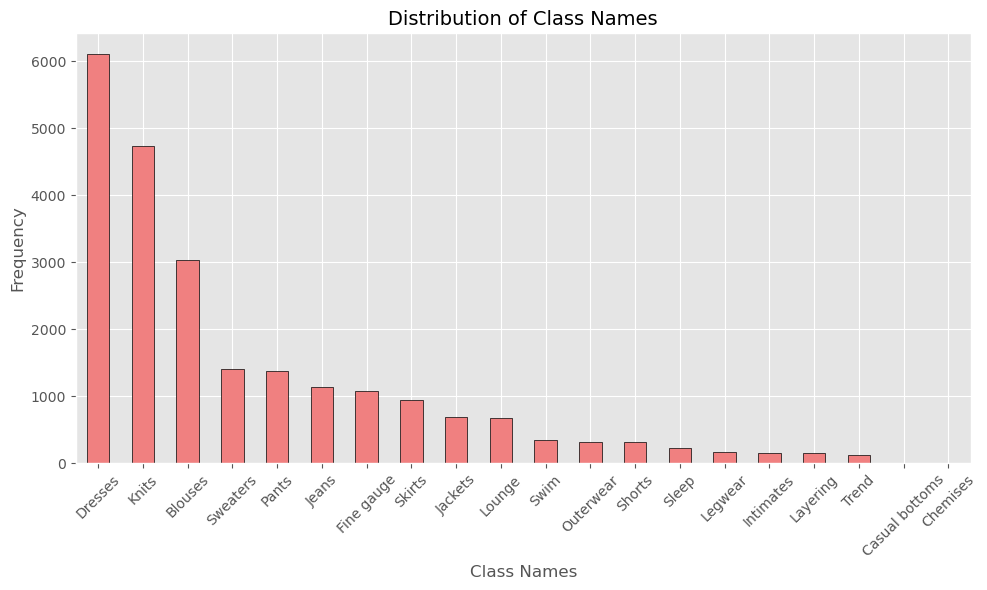

In [16]:
plt.figure(figsize=(10, 6))  
df['class_name'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')


plt.title('Distribution of Class Names', fontsize=14)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [17]:
#summary for recommendation
df.recommendation.value_counts()

recommendation
True     18906
False     4037
Name: count, dtype: int64

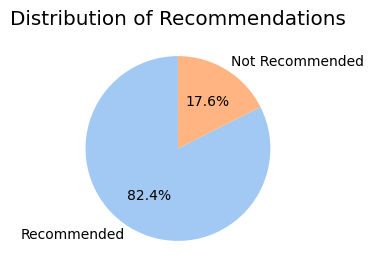

In [18]:
recommendation_counts = df['recommendation'].value_counts()

#custom labels
labels = ['Recommended', 'Not Recommended']

#create pie chart
plt.figure(figsize=(3, 3))  
recommendation_counts.plot.pie(
    labels=labels,  
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel")
)
plt.title('Distribution of Recommendations')
plt.ylabel('')  
plt.show()

Feature engineering included one-hot encoding of categorical variables and replacing Boolean values with integers for seamless integration into machine learning algorithms. Finally, MinMaxScaler was used to scale numerical features, ensuring uniformity across all variables and compatibility with KNN, which relies on distance-based metrics. These steps collectively ensured the dataset was clean, structured, and ready for robust model training and analysis.

In [19]:
#one-hot encoding using get_dummies
df = pd.get_dummies(df, columns=['division_name', 'department_name', 'class_name'], drop_first=True)

#replace boolean values with integers
df = df.replace({True: 1, False: 0})

#ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [20]:
df

,age,alike_feedback_count,rating,recommendation,division_name_General Petite,division_name_Initmates,department_name_Dresses,department_name_Intimate,department_name_Jackets,department_name_Tops,department_name_Trend,class_name_Casual bottoms,class_name_Chemises,class_name_Dresses,class_name_Fine gauge,class_name_Intimates,class_name_Jackets,class_name_Jeans,class_name_Knits,class_name_Layering,class_name_Legwear,class_name_Lounge,class_name_Outerwear,class_name_Pants,class_name_Shorts,class_name_Skirts,class_name_Sleep,class_name_Sweaters,class_name_Swim,class_name_Trend
0,40,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,62,12,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,37,0,5,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,44,0,5,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23482,39,1,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23483,29,0,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23484,57,10,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#separate the X explanatory variables from the response Y variable readmission into different dataframes
df_X = df.drop(['recommendation'], axis=1).copy()
df_y = df['recommendation'].copy()

In [22]:
#standardize the X variables to put all on the same scale for KNN to measure distance
df_X = pd.DataFrame(MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
df_X

,age,alike_feedback_count,rating,division_name_General Petite,division_name_Initmates,department_name_Dresses,department_name_Intimate,department_name_Jackets,department_name_Tops,department_name_Trend,class_name_Casual bottoms,class_name_Chemises,class_name_Dresses,class_name_Fine gauge,class_name_Intimates,class_name_Jackets,class_name_Jeans,class_name_Knits,class_name_Layering,class_name_Legwear,class_name_Lounge,class_name_Outerwear,class_name_Pants,class_name_Shorts,class_name_Skirts,class_name_Sleep,class_name_Sweaters,class_name_Swim,class_name_Trend
0,0.354839,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.709677,0.631579,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467742,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.435484,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306452,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,0.419355,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22939,0.338710,0.052632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22940,0.177419,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22941,0.629032,0.526316,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_y

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    1
23484    1
23485    1
Name: recommendation, Length: 22943, dtype: int64

In [24]:
#save the prepared dataset to a csv file
df.to_csv('D214Capstone_cleaned.csv', index=False)

Justification of Tools and Techniques:
- The Pandas library was essential for data manipulation and preprocessing, as its efficient handling of structured data made it the optimal choice for this project. An advantage of Pandas is that it simplifies complex data-wrangling tasks with its intuitive syntax and robust methods. However, a disadvantage is that it can be memory-intensive when working with very large datasets, potentially slowing down processing speed.

- The NumPy library was used for numerical operations and was crucial in enabling efficient computation of statistical measures, such as the Z-score, for detecting outliers. An advantage of NumPy is that it is highly optimized for numerical computations, ensuring precise and fast execution. However, a disadvantage is that it has a steeper learning curve for non-programmers and lacks built-in visualization features, which may limit its functionality compared to more comprehensive tools.

- Matplotlib and Seaborn were used as visualization tools to create histograms, bar charts, and pie charts for visually exploring data distributions. An advantage of these tools is their ability to produce detailed and customizable visualizations, which provide critical insights into the dataset. However, a disadvantage is that creating more advanced or interactive visualizations can be cumbersome and time-consuming compared to specialized tools like Tableau.

- MinMaxScaler was used to scale numerical features to ensure compatibility with the KNN model. An advantage of MinMaxScaler is that it provides all features on the same scale, which is essential for distance-based algorithms like KNN to perform accurately. However, a disadvantage is that it is sensitive to outliers, which can distort the scaling process if outliers are not removed beforehand, potentially affecting the model's performance.

Using these tools and techniques, combined with the adaptability of the KNN algorithm, allowed the data to be appropriately prepared for analysis. This approach effectively addressed challenges such as missing values and categorical variables.

**D: Analysis**

The data-analysis process involved a systematic approach to identify key predictors of customer recommendations and assess model performance. 

First, feature selection was performed using the SelectKBest method with the f_classif scoring function. This technique calculated each feature's statistical significance (p-values) in relation to the target variable, 'recommendation.' Features with p-values below 0.05, such as 'rating,' 'alike_feedback_count,' 'age,' and specific product categories like 'class_name_Jeans' and 'class_name_Lounge,' were identified as significant predictors. Additionally, multicollinearity among these selected features was assessed using Variance Inflation Factors (VIF). Features with high VIF values (higher than 10), such as 'class_name_Dresses,' were removed to ensure the model's stability and avoid redundancy.

In [25]:
#use SelectKBest to determine the best variables to include in the model 
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'Feature' : df_X.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals[feat_pvals['p_value'] < 0.05] 

,Feature,p_value
2,rating,0.000000e+00
1,alike_feedback_count,1.109243e-29
16,class_name_Jeans,2.642790e-08
0,age,3.353553e-06
5,department_name_Dresses,9.984543e-04
12,class_name_Dresses,9.984543e-04
6,department_name_Intimate,2.539323e-03
4,division_name_Initmates,2.652695e-03
8,department_name_Tops,9.048284e-03
20,class_name_Lounge,1.005150e-02


In [26]:
#significant features based on SelectKBest results
significant_vars = [
    'rating', 'alike_feedback_count', 
    'class_name_Jeans', 'age', 'class_name_Dresses', 'department_name_Dresses', 
    'department_name_Intimate', 'division_name_Initmates', 'department_name_Tops', 
    'class_name_Lounge', 'class_name_Sweaters', 'department_name_Trend', 'class_name_Trend'
]

#check VIF for multicollinearity
X = df[significant_vars]

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                     feature        VIF
0                     rating   8.918155
1       alike_feedback_count   1.350852
2           class_name_Jeans   1.259651
3                        age   9.063865
4         class_name_Dresses        inf
5    department_name_Dresses        inf
6   department_name_Intimate  13.301461
7    division_name_Initmates   9.794469
8       department_name_Tops   3.435385
9          class_name_Lounge   2.164648
10       class_name_Sweaters   1.158454
11     department_name_Trend        inf
12          class_name_Trend        inf


In [27]:
#drop variables with high VIF values higher than 10
to_drop = ["class_name_Dresses", "department_name_Dresses", "department_name_Trend", 
           "class_name_Trend", "department_name_Intimate"]

X = X.drop(columns=to_drop)

In [28]:
#define remaining variables after dropping high VIF ones
remaining_vars = [
    "rating", "alike_feedback_count", "class_name_Jeans", "age","division_name_Initmates", 
    "department_name_Tops", "class_name_Lounge", "class_name_Sweaters"
]

X_remaining = df[remaining_vars]

#check VIF for the remaining variables
vif_df_new = pd.DataFrame()
vif_df_new['feature'] = X_remaining.columns
vif_df_new['VIF'] = [variance_inflation_factor(X_remaining.values, i) for i in range(X_remaining.shape[1])]

print(vif_df_new)

                   feature       VIF
0                   rating  8.030759
1     alike_feedback_count  1.346570
2         class_name_Jeans  1.111855
3                      age  8.437845
4  division_name_Initmates  1.355493
5     department_name_Tops  2.132534
6        class_name_Lounge  1.264110
7      class_name_Sweaters  1.158443


Then, the dataset was split into training (80%) and testing (20%) sets. 

In [29]:
X = df_X[["rating", "alike_feedback_count", "class_name_Jeans", 
          "age", "department_name_Tops", "class_name_Lounge", 
          "class_name_Sweaters"]].copy()

#response variable
y = df_y

#split the data into 80% train/20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y
)

In [30]:
#save each of the four data sets to CSV files
X_train.to_csv('d214_Xtrain.csv', index=False)
X_test.to_csv('d214_Xtest.csv', index=False)
y_train.to_csv('d214_ytrain.csv', index=False)
y_test.to_csv('d214_ytest.csv', index=False)

The primary analysis technique employed was the KNN algorithm, which was selected for its simplicity and effectiveness in classification tasks. GridSearchCV was used to optimize the value of 'k,' the number of neighbors, by testing a range of values from 1 to 50. 

In [31]:
#run gridsearch cv to find best number of k
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X_train, y_train)
print('The best parameters for this model: {}'.format(knn_cv.best_params_))

#calculate the mean score (for the best parameter setting found by the gridsearch)
mean_score = knn_cv.cv_results_['mean_test_score'][knn_cv.best_index_]
print('Mean score: {}'.format(mean_score))

The best parameters for this model: {'n_neighbors': 36}
Mean score: 0.9327667698145193


The optimal 'k' value was determined to be 36, based on cross-validated mean scores. The KNN model was trained on the selected features and evaluated on a test dataset. 

In [32]:
#perform KNN using the k=36
knn = KNeighborsClassifier(n_neighbors = 36)

#fit to the training data
knn.fit(X_train, y_train)

#print accuracy of the model
print("The accuracy of the model is: ", knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

The accuracy of the model is:  0.9378949662235782
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       807
           1       0.98      0.95      0.96      3782

    accuracy                           0.94      4589
   macro avg       0.88      0.92      0.90      4589
weighted avg       0.94      0.94      0.94      4589



The results show that the KNN model performs exceptionally well, achieving an overall accuracy of about 93.79%. For class 0 (not recommended), the model has a precision of 78%, meaning that out of all the products predicted as "not recommended," 78% were correct. 

It has a recall of 89%, indicating that 89% of the actual "not recommended" products were correctly identified.

For class 1 (recommended), the precision is very high at 98%, showing that almost all predicted recommendations were accurate, while the recall is 95%, meaning the model successfully identified 95% of actual recommendations.

The F1 scores, which balance precision and recall, are 0.83 for class 0 and 0.96 for class 1. 

The weighted average metrics (precision, recall, and F1-score) are all 0.94, reflecting excellent overall performance despite the class imbalance. 

These results demonstrate the model's reliability in distinguishing between recommended and not recommended products.

In [33]:
#print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 719   88]
 [ 197 3585]]


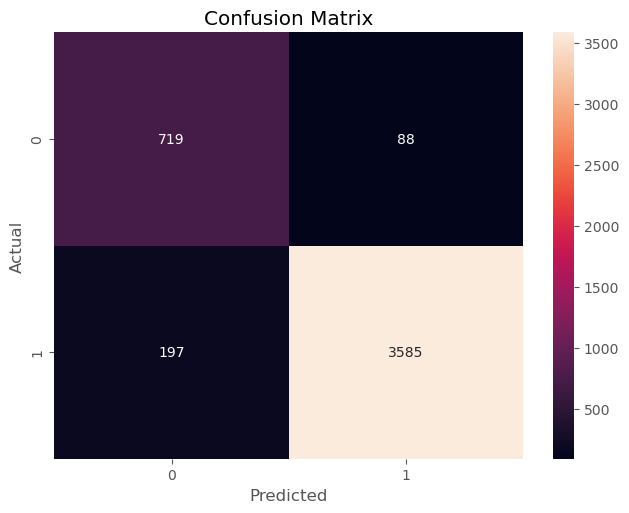

In [34]:
#use seaborn heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('matrix1.jpg')

The confusion matrix shows how well the model predicted customer recommendations. Of all the products that were not recommended (class 0), the model correctly identified 719 but mistakenly classified 88 of them as recommended (false positives). For the recommended products (class 1), the model accurately predicted 3585 cases, but it missed 197, incorrectly labeling them as not recommended (false negatives). Overall, the majority of predictions were correct, with very few errors. This shows that the model is effective at distinguishing between recommended and not recommended products, although there is room for improvement in reducing misclassifications.

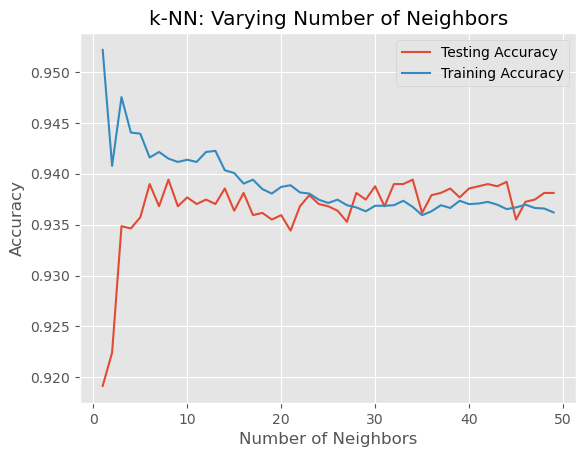

In [35]:
#model complexity curve
neighbors = np. arange(1, 50)
train_accuracy = np.empty (len (neighbors))
test_accuracy = np.empty (len (neighbors))

#loop over different values of k
for i, k in enumerate (neighbors):
    
#setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier (n_neighbors=k)

#fit the classifier to the training data
    knn.fit (X_train,y_train)

#compute accuracy on the training set
    train_accuracy[i] = knn.score (X_train, y_train)

#compute accuracy on the testing set
    test_accuracy[i] = knn. score (X_test, y_test)

#generate plot
plt.title ('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot (neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
#print accuracy on train and test sets
print("Train Accuracy:", train_accuracy[i], "Test Accuracy:", test_accuracy[i])

Train Accuracy: 0.9361991936362646 Test Accuracy: 0.9381128786227937


The model achieved a training accuracy of 93.62% and a testing accuracy of 93.81%. This indicates that the model performs consistently well on both the training data and unseen test data, with no significant signs of overfitting or underfitting. The similarity between the train and test accuracy values demonstrates that the model has effectively learned patterns from the data and generalizes well to new data, making it a reliable tool for predicting customer recommendations.

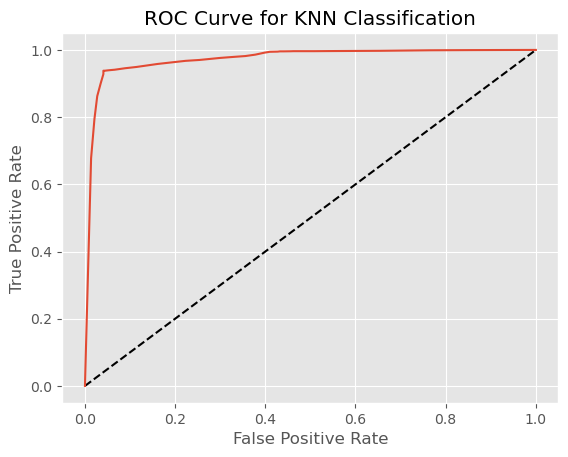

The Area Under the Curve (AUC) score is: 0.9727100325876763



In [37]:
#generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")

The model achieved an AUC score of 0.97. This indicates that the KNN model has an excellent ability to distinguish between the two classes: recommended and not recommended products. An AUC score close to 1 reflects strong discriminatory power, meaning the model is highly effective at identifying true positives while minimizing false positives across various classification thresholds. This result highlights the reliability and robustness of the model in making accurate predictions.

The KNN algorithm was chosen because it does not assume a specific data distribution, making it suitable for diverse datasets. Additionally, it automatically adapts to new data, making it straightforward to implement without requiring extensive training. An advantage of KNN is its ability to handle non-linear decision boundaries effectively. However, one disadvantage is its sensitivity to feature scaling and its computational inefficiency when applied to large datasets. Despite these limitations, the KNN model proved highly effective for analyzing structured e-commerce data and generating actionable insights. This rigorous process ensured the analysis was accurate and meaningful for addressing the research question.

**E: Data Summary and Implications**

The analysis provided valuable insights into the research question, identifying several key predictors of customer recommendations for women’s clothing products. 

The selected features, including 'rating,' 'alike_feedback_count,' 'class_name_Jeans,' 'age,' 'department_name_Tops,' 'class_name_Lounge,' and 'class_name_Sweaters,' were determined to be significant contributors to the model's predictive power. 

The KNN model demonstrated excellent performance, achieving a high accuracy of 93.78% and an AUC score of 0.97, affirming its effectiveness in analyzing structured data. These features provided a comprehensive understanding of customer behavior, with 'rating' and 'alike_feedback_count' particularly influential. 

However, one limitation of the study is the static nature of the dataset, which may not fully reflect evolving e-commerce trends or customer preferences, potentially reducing the generalizability of the results. Based on these findings, businesses are advised to focus on products with high ratings and positive feedback while customizing marketing strategies to reflect customer demographics, particularly age, and preferences within specific product categories like 'Jeans,' 'Lounge,' and 'Sweaters.' 

Incorporating unstructured data, such as textual reviews or product descriptions, through NLP techniques could enhance the analysis for future research. Additionally, updating the dataset with more recent or real-time data would address the static nature of the current dataset, enabling more dynamic and actionable insights. These steps would build upon the current findings and provide a deeper understanding of customer behavior and preferences.

**F: Sources**

Amazon reviews on Women dresses (23K Datapoints). (2022, June 14). Kaggle. https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive/data 

BasuMallick, C. (2022, December 6). The 12 vital differences between R and Python. Spiceworks Inc. https://www.spiceworks.com/tech/devops/articles/r-vs-python/ 

GeeksforGeeks. (2025b, January 29). KNeArest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/